In [1]:
import json
import numpy as np
import pandas as pd
import os
import h5py
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
X = []
y = []
with h5py.File("../data/behaviours.hdf5", 'r') as ds:
    for i, key in enumerate(ds):
        print("Loading", key)
        X.append(ds[key][...])
        y.append(np.ones(ds[key].shape[0])*i)
        
        
X = np.concatenate(X, axis=0)
X[np.isnan(X)] = 0
y = np.concatenate(y, axis=0)

print(X.shape, y.shape)

Loading frontal_swings_upwards
Loading lateral_rotations_clockwise
Loading marker_up
Loading marker_up_frontal_swing
Loading marker_up_lateral_rotations
Loading marker_up_lateral_swing
Loading motor_marker_1
Loading random_motions
(92514, 13) (92514,)


In [4]:
# Pose information (= motor camera image, (x,y,z) + quaternion)
X_pose = X[:,0:3]   # only the first two components (x, y) have non-zero values
# Motor displacements
X_disp = X[:,7:13]   # last motor component is zero
X_disp[X_disp < 0] = 0

print(X_disp.shape)
print(X_pose.shape)

#X_pose[:,2] = (X_pose[:,0] + X_pose[:,1])/2 + 100 * np.random.rand(92514)

(92514, 6)
(92514, 3)


In [5]:
y = X_pose[:,0:3]
x = X_disp[:,0:6]

print(x.shape)
print(y.shape)

(92514, 6)
(92514, 3)


In [6]:
x_data = np.zeros((92514 - 10 +1,10,6))
y_data = np.zeros((92514 - 10 +1,10,3))

for i in range(92514 - 10 +1):
    x_data[i,:,:] = x[i:i+10,:]

for i in range(92514 - 10 +1):
    y_data[i,:,:] = y[i:i+10,:] 

print(x_data.shape)
print(y_data.shape)

(92505, 10, 6)
(92505, 10, 3)


In [7]:
xx = torch.randn(92514 - 10 +1, 6, 1, 10)


for i in range(92514 - 10 +1):
    for j in range(10):  
        xx[i,:,0, j] = torch.from_numpy(x_data[i,j,:])
        

train_data = xx[0:90000,:,:,:]
val_data = xx[90000:92505,:,:,:]


yy = torch.randn(92514 - 10 +1, 3, 1, 10)
for i in range(92514 - 10 +1):
    for j in range(10):  
        yy[i,:,0, j] = torch.from_numpy(y_data[i,j,:])



train_labels = yy[0:90000,:,:,:]
val_labels = yy[90000:92505,:,:,:]


print(train_data.shape)
print(val_data.shape)
print(train_labels.shape)
print(val_labels.shape)

def num_flat_features(x):
    """
    Computes the number of features if the spatial input x is transformed
    to a 1D flat input.
    """
    size = x.size()[1:]  # all dimensions except the batch dimension
    num_features = 1
    for s in size:
        num_features *= s
    return num_features

train_labels_1 = train_labels.view(-1, num_flat_features(train_labels))
print(train_labels_1.shape)

torch.Size([90000, 6, 1, 10])
torch.Size([2505, 6, 1, 10])
torch.Size([90000, 3, 1, 10])
torch.Size([2505, 3, 1, 10])
torch.Size([90000, 30])


In [46]:
from dl4cv.classifiers.classification_cnn import ClassificationCNN
from dl4cv.solver_old import Solver

#train_loader = torch.utils.data.DataLoader(train_data, batch_size=50, shuffle=True, num_workers=4)
#val_loader = torch.utils.data.DataLoader(val_data, batch_size=50, shuffle=False, num_workers=4)

model = ClassificationCNN()
solver = Solver(optim_args={"lr": 1e-3})  # overfit bcz generalisation is 0

solver.train(model, train_data, train_labels, val_data, val_labels, batch_size =50, log_nth=1, num_epochs=10)



START TRAIN.
iteration 0 / 18000: loss 48722.296875
iteration 100 / 18000: loss 27597.410156
iteration 200 / 18000: loss 16625.701172
iteration 300 / 18000: loss 10247.743164
iteration 400 / 18000: loss 9734.291992
iteration 500 / 18000: loss 9679.701172
iteration 600 / 18000: loss 9056.943359
iteration 700 / 18000: loss 12895.193359
iteration 800 / 18000: loss 9441.536133
iteration 900 / 18000: loss 8156.923340
iteration 1000 / 18000: loss 9990.035156
iteration 1100 / 18000: loss 6825.448242
iteration 1200 / 18000: loss 8851.590820
iteration 1300 / 18000: loss 10657.677734
iteration 1400 / 18000: loss 10294.985352
iteration 1500 / 18000: loss 7405.454590
iteration 1600 / 18000: loss 8011.096680
iteration 1700 / 18000: loss 6307.189453
iteration 1800 / 18000: loss 4646.588867
iteration 1900 / 18000: loss 3549.528564
iteration 2000 / 18000: loss 3512.715332
iteration 2100 / 18000: loss 4270.323242
iteration 2200 / 18000: loss 4540.411621
iteration 2300 / 18000: loss 3027.347656
iteratio

In [47]:
solver.train(model, train_data, train_labels, val_data, val_labels, batch_size =50, log_nth=1, num_epochs=100)


START TRAIN.
iteration 0 / 180000: loss 1344.383301
iteration 100 / 180000: loss 1560.109497
iteration 200 / 180000: loss 1535.641113
iteration 300 / 180000: loss 900.006836
iteration 400 / 180000: loss 692.131653
iteration 500 / 180000: loss 1730.620361
iteration 600 / 180000: loss 1002.488159
iteration 700 / 180000: loss 664.821411
iteration 800 / 180000: loss 617.064148
iteration 900 / 180000: loss 1246.969604
iteration 1000 / 180000: loss 854.607361
iteration 1100 / 180000: loss 794.654724
iteration 1200 / 180000: loss 1195.166626
iteration 1300 / 180000: loss 1543.803955
iteration 1400 / 180000: loss 1052.328369
iteration 1500 / 180000: loss 1059.383423
iteration 1600 / 180000: loss 1154.911377
iteration 1700 / 180000: loss 973.631592
iteration 1800 / 180000: loss 913.516663
iteration 1900 / 180000: loss 1091.865112
iteration 2000 / 180000: loss 1326.873291
iteration 2100 / 180000: loss 918.699097
iteration 2200 / 180000: loss 911.664062
iteration 2300 / 180000: loss 865.893860
it

iteration 19600 / 180000: loss 1201.098633
iteration 19700 / 180000: loss 1201.264526
iteration 19800 / 180000: loss 945.987732
iteration 19900 / 180000: loss 1053.574463
iteration 20000 / 180000: loss 1277.893799
iteration 20100 / 180000: loss 1137.145508
iteration 20200 / 180000: loss 932.668945
iteration 20300 / 180000: loss 865.467834
iteration 20400 / 180000: loss 676.185974
iteration 20500 / 180000: loss 769.131836
iteration 20600 / 180000: loss 1335.730347
iteration 20700 / 180000: loss 648.115967
iteration 20800 / 180000: loss 1636.662842
iteration 20900 / 180000: loss 965.787842
iteration 21000 / 180000: loss 924.630249
iteration 21100 / 180000: loss 813.781311
iteration 21200 / 180000: loss 965.778442
iteration 21300 / 180000: loss 925.594849
iteration 21400 / 180000: loss 882.150330
iteration 21500 / 180000: loss 1071.487305
iteration 21600 / 180000: loss 1031.553589
iteration 21700 / 180000: loss 1394.436523
iteration 21800 / 180000: loss 970.407104
iteration 21900 / 180000

iteration 38900 / 180000: loss 1353.582153
iteration 39000 / 180000: loss 1027.913574
iteration 39100 / 180000: loss 1177.325684
iteration 39200 / 180000: loss 907.568420
iteration 39300 / 180000: loss 1171.954834
iteration 39400 / 180000: loss 706.352600
iteration 39500 / 180000: loss 1127.071411
iteration 39600 / 180000: loss 1153.093994
iteration 39700 / 180000: loss 971.721069
iteration 39800 / 180000: loss 1187.011963
iteration 39900 / 180000: loss 871.815308
iteration 40000 / 180000: loss 1220.918457
iteration 40100 / 180000: loss 1007.114319
iteration 40200 / 180000: loss 1011.441895
iteration 40300 / 180000: loss 762.833069
iteration 40400 / 180000: loss 922.213196
iteration 40500 / 180000: loss 1304.519897
iteration 40600 / 180000: loss 1077.726685
iteration 40700 / 180000: loss 1228.668945
iteration 40800 / 180000: loss 1342.494995
iteration 40900 / 180000: loss 1190.693115
iteration 41000 / 180000: loss 1438.588867
iteration 41100 / 180000: loss 1009.994995
iteration 41200 /

KeyboardInterrupt: 

In [2]:
from dl4cv.classifiers.classification_cnn import ClassificationCNN
from dl4cv.solver_old import Solver
model = ClassificationCNN()
c = Variable(torch.randn(3, 6, 1, 10))
d = model(c)
print(d)
e = torch.mean(d,1)
print(e)

Variable containing:
(0 ,0 ,.,.) = 

Columns 0 to 8 
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0136  0.0000  0.0000

Columns 9 to 9 
   0.0000

(0 ,1 ,.,.) = 

Columns 0 to 8 
   0.1487  0.0000  0.0388  0.0000  0.0000  0.1547  0.0000  0.0424  0.0000

Columns 9 to 9 
   0.0000

(0 ,2 ,.,.) = 

Columns 0 to 8 
   0.1322  0.0000  0.1487  0.0125  0.2294  0.0000  0.0000  0.1677  0.1547

Columns 9 to 9 
   0.0000

(1 ,0 ,.,.) = 

Columns 0 to 8 
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0294  0.0296  0.0000  0.0347

Columns 9 to 9 
   0.0218

(1 ,1 ,.,.) = 

Columns 0 to 8 
   0.0838  0.0000  0.0922  0.0000  0.0000  0.1567  0.0532  0.0590  0.0268

Columns 9 to 9 
   0.0000

(1 ,2 ,.,.) = 

Columns 0 to 8 
   0.1376  0.0000  0.1551  0.0617  0.2060  0.0000  0.0000  0.1260  0.1676

Columns 9 to 9 
   0.0000

(2 ,0 ,.,.) = 

Columns 0 to 8 
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0128

Columns 9 to 9 
   0.0000

(2 ,1 ,.,.) = 

Columns 0 to 8 
   0.0828

(90000, 3, 1)
(90000, 3, 1)


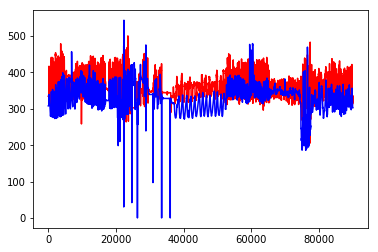

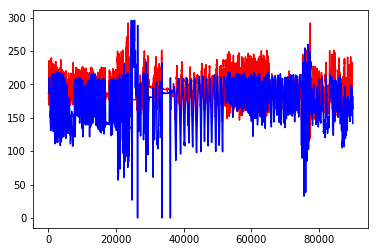

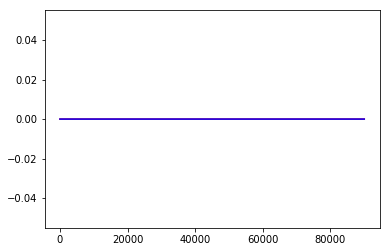

In [48]:
import numpy

t = np.arange(1, 90001, 1)
pred = model(Variable(train_data))
pred = torch.mean(pred,3)
pred = pred.data.numpy()

#true= val_labels.view(-1, num_flat_features(val_labels))
true = torch.mean(train_labels,3)
true = true.numpy()

print(pred.shape)
print(true.shape)

plt.figure(1)
plt.plot(t, pred[:,0,0], 'r', t, true[:,0,0], 'b')
plt.figure(2)
plt.plot(t, pred[:,1,0], 'r', t, true[:,1,0], 'b')
plt.figure(3)
plt.plot(t, pred[:,2,0], 'r', t, true[:,2,0], 'b')
#plt.show()
